In [5]:
import scanpy as sc
import numpy as np
import scFates as scf

In [6]:
adata=sc.read("data/adata_tree.h5ad")
r="NCC2"
mils=["Sensory 1","Hub"]
scf.tl.subset_tree(adata,r,mils)

subsetting tree
node 254 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


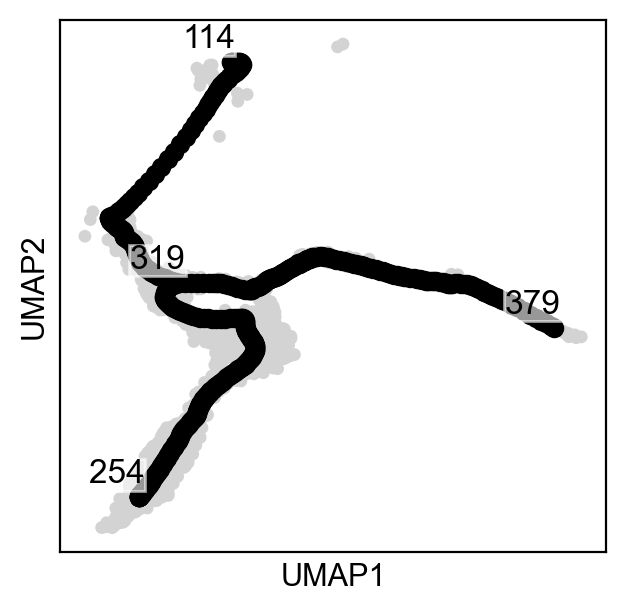

In [7]:
scf.pl.graph(adata)

In [8]:
scf.tl.dendrogram(adata,crowdedness=.01)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00, 14.55it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


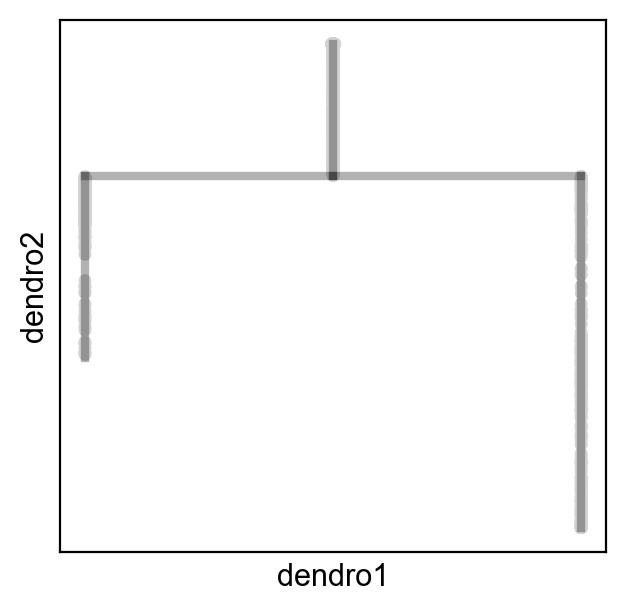

In [9]:
scf.pl.dendrogram(adata)

In [10]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [01:40<00:00, 215.87it/s]
    found 1735 significant features (0:01:40) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [11]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 1735/1735 [00:13<00:00, 125.66it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:15) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


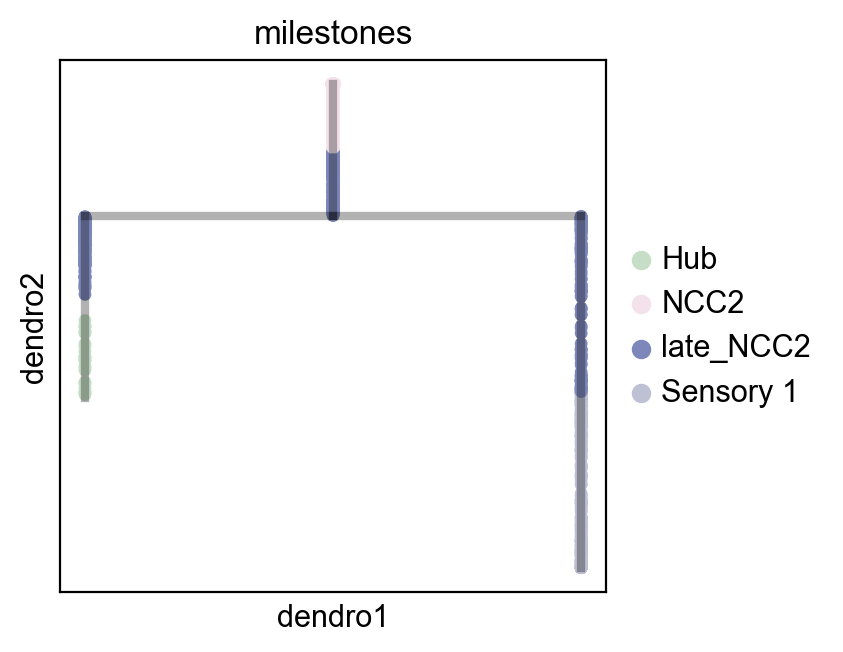

In [12]:
scf.pl.dendrogram(adata,color="milestones")

In [13]:
scf.tl.test_fork(adata,r,mils,n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 1735/1735 [00:24<00:00, 71.57it/s]
    test for upregulation for each leave vs root
    upreg Hub: 100%|██████████| 906/906 [00:01<00:00, 477.88it/s]
    finished (0:00:27) --> added 
    .uns['NCC2->Sensory 1<>Hub']['fork'], DataFrame with fork test results.


In [14]:
scf.tl.branch_specific(adata,r,mils,effect=.1)

    branch specific features: Sensory 1: 434, Hub: 148
    finished --> updated 
    .uns['NCC2->Sensory 1<>Hub']['fork'], DataFrame updated with additionnal 'branch' column.


In [15]:
scf.tl.activation(adata,r,mils,deriv_cut=.2,n_jobs=20)

testing activation
    to Hub: 100%|██████████| 148/148 [00:01<00:00, 99.21it/s]
    threshold pseudotime is: 0.02056029950443417
    63 early and 371 late features specific to leave Sensory 1
    67 early and 81 late features specific to leave Hub
    finished (0:00:06) --> updated 
    .uns['NCC2->Sensory 1<>Hub']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [16]:
adata.write("data/adata_bif_sensory1.h5ad")

In [25]:
adata=sc.read("data/adata_tree.h5ad")
r="NCC2"
mils=["Sensory 2","SatGlia"]
scf.tl.subset_tree(adata,r,mils)

subsetting tree
node 366 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [27]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [02:39<00:00, 135.55it/s]
    found 3948 significant features (0:02:40) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [28]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 3948/3948 [01:01<00:00, 63.77it/s]
    finished (adata subsetted to keep only fitted features!) (0:01:06) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [29]:
scf.tl.test_fork(adata,r,mils,n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 3948/3948 [00:35<00:00, 110.64it/s]
    test for upregulation for each leave vs root
    upreg SatGlia: 100%|██████████| 1903/1903 [00:01<00:00, 1332.85it/s]
    finished (0:00:40) --> added 
    .uns['NCC2->Sensory 2<>SatGlia']['fork'], DataFrame with fork test results.


In [30]:
scf.tl.branch_specific(adata,r,mils,effect=1)

    branch specific features: Sensory 2: 263, SatGlia: 214
    finished --> updated 
    .uns['NCC2->Sensory 2<>SatGlia']['fork'], DataFrame updated with additionnal 'branch' column.


In [31]:
scf.tl.activation(adata,r,mils,deriv_cut=.2,pseudotime_offset=.02,n_jobs=20,)

testing activation
    to SatGlia: 100%|██████████| 214/214 [00:02<00:00, 77.82it/s]
    threshold pseudotime is: 0.05104037303280258
    17 early and 246 late features specific to leave Sensory 2
    76 early and 138 late features specific to leave SatGlia
    finished (0:00:07) --> updated 
    .uns['NCC2->Sensory 2<>SatGlia']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [32]:
scf.tl.dendrogram(adata,crowdedness=.01)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


In [33]:
adata.write("data/adata_bif_sensory2.h5ad")